In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib  # For saving trained models

# Define paths for train and test datasets
train_path = r"C:\Users\S569652\Documents\INADS\data\train_set_fixed.csv"
test_path = r"C:\Users\S569652\Documents\INADS\data\test_set_fixed.csv"

# Load the datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display dataset shape
print(f"Train Set Shape: {train_df.shape}, Test Set Shape: {test_df.shape}")

Train Set Shape: (1618172, 16), Test Set Shape: (404543, 16)


In [5]:
# Separate Features (X) and Labels (y)
X_train, y_train = train_df.drop(columns=["Label"]), train_df["Label"]
X_test, y_test = test_df.drop(columns=["Label"]), test_df["Label"]

# Convert labels into numeric values for model training
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Print label mapping
print(f"Encoded Classes: {label_encoder.classes_}")

Encoded Classes: ['Benign' 'Brute Force -Web' 'Brute Force -XSS' 'DDoS attacks-LOIC-HTTP'
 'DoS attacks-GoldenEye' 'DoS attacks-Slowloris' 'Infilteration']


In [6]:
# Initialize Random Forest model
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Training Random Forest Model...")
rf_baseline.fit(X_train, y_train_encoded)
print("Model Training Completed.")

Training Random Forest Model...
Model Training Completed.


In [7]:
# Predict on Training and Test Sets
y_pred_train = rf_baseline.predict(X_train)
y_pred_test = rf_baseline.predict(X_test)

# Evaluate Model Performance
train_accuracy = accuracy_score(y_train_encoded, y_pred_train)
test_accuracy = accuracy_score(y_test_encoded, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test_encoded, y_pred_test, target_names=label_encoder.classes_))

Train Accuracy: 0.9791
Test Accuracy: 0.9479

Classification Report (Test Set):
                        precision    recall  f1-score   support

                Benign       0.96      0.97      0.96    266244
      Brute Force -Web       0.90      0.61      0.73        72
      Brute Force -XSS       0.94      0.97      0.95        30
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    115235
 DoS attacks-GoldenEye       1.00      1.00      1.00      8291
 DoS attacks-Slowloris       1.00      1.00      1.00      2057
         Infilteration       0.07      0.06      0.07     12614

              accuracy                           0.95    404543
             macro avg       0.84      0.80      0.81    404543
          weighted avg       0.94      0.95      0.94    404543



<Figure size 1000x800 with 0 Axes>

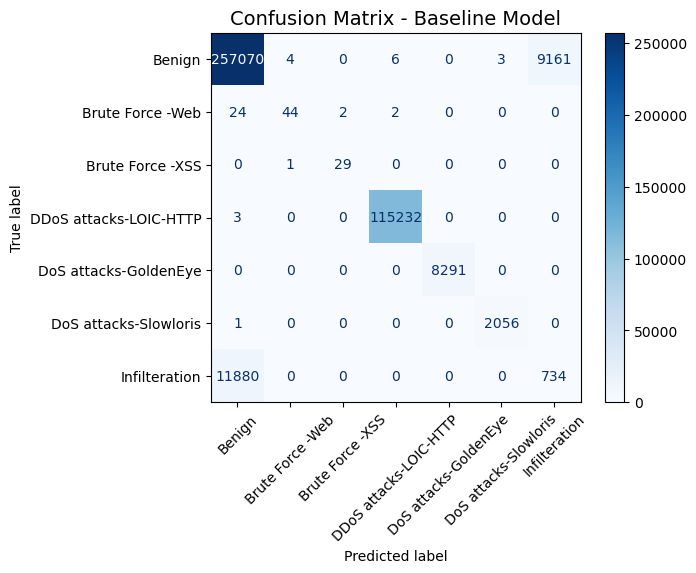

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Set figure size for better readability
plt.figure(figsize=(10, 8))

# Generate Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(
    rf_baseline, 
    X_test, 
    y_test_encoded, 
    display_labels=label_encoder.classes_, 
    cmap="Blues",
    xticks_rotation=45  # Rotate labels for better clarity
)

# Add Title
plt.title("Confusion Matrix - Baseline Model", fontsize=14)

# Display the plot
plt.show()


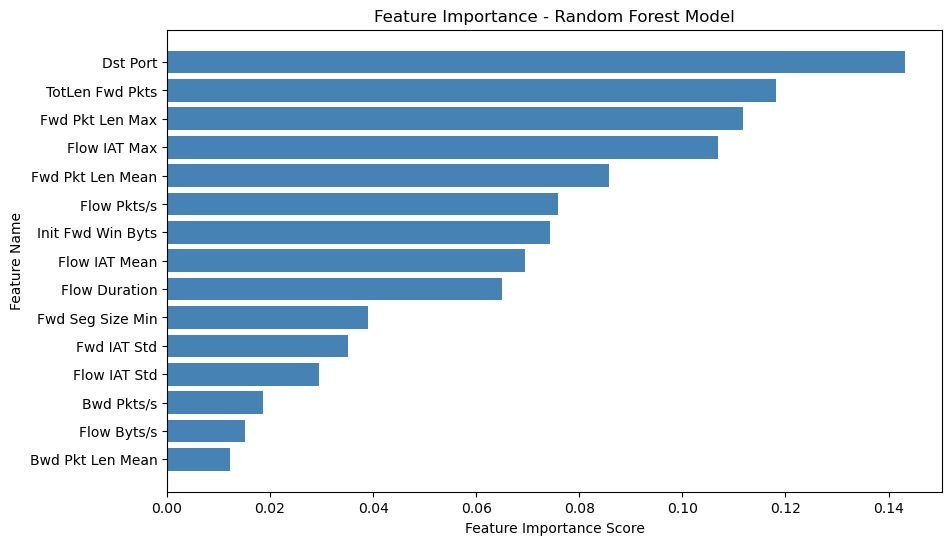

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extract Feature Importances from the trained RF baseline model
feature_importance = rf_baseline.feature_importances_

# Create DataFrame for visualization
feature_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_df["Feature"], feature_df["Importance"], color="steelblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

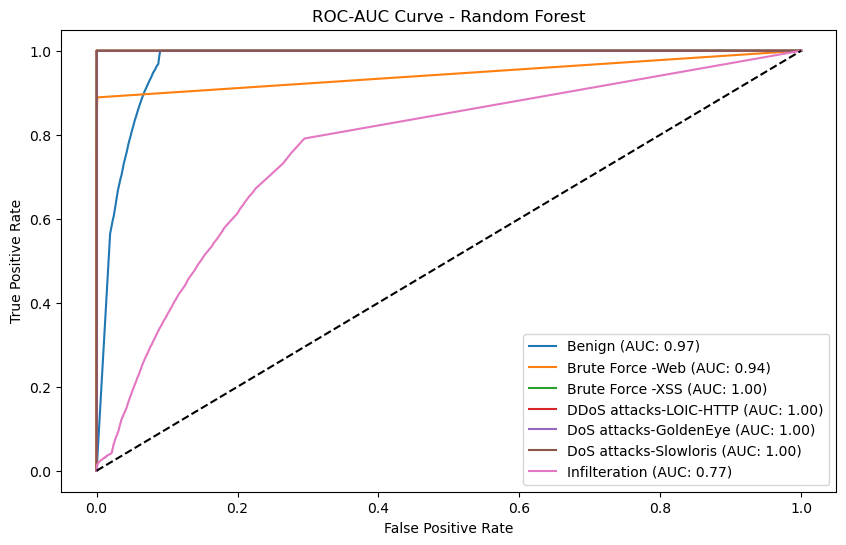

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities from Random Forest baseline model
y_pred_proba = rf_baseline.predict_proba(X_test)

# Convert y_test to binary format for multi-class ROC
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test_encoded, classes=np.arange(len(label_encoder.classes_)))

# Compute ROC-AUC for each class
plt.figure(figsize=(10, 6))
for i in range(len(label_encoder.classes_)):  
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])  
    auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC: {auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve - Random Forest")
plt.legend()
plt.show()